# Titanic Data Analysis

## Introduction
**Purpose:** To performa data analysis on a sample Titanic dataset. 

This dataset contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. You can view a description of this dataset on the Kaggle website, where the data was obtained (https://www.kaggle.com/c/titanic/data).


## Questions

"One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class." -  https://www.kaggle.com/c/titanic

What factors made people more likely to survive?
1. **Were social-economic standing a factor in survival rate?**
2. **Did age, regardless of sex, determine your chances of survival?**
3. **Did women and children have preference to lifeboats (survival)?**

**Assumption:** We are going to assume that everyone who survived made it to a life boat and it wasn't by chance or luck.

## Data Wrangling 

### Data Description
(from https://www.kaggle.com/c/titanic)

- **survival:** Survival (0 = No; 1 = Yes)
- **pclass:** Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- **name:** Name
- **sex:** Sex
- **age:** Age
- **sibsp:** Number of Siblings/Spouses Aboard
- **parch:** Number of Parents/Children Aboard
- **ticket:** Ticket Number
- **fare:** Passenger Fare
- **cabin:** Cabin
- **embarked:** Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

**Special Notes:**
- Pclass is a proxy for socio-economic status (SES) 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower
- Age is in Years; Fractional if Age less than One (1) If the Age is Estimated, it is in the form xx.5


In [36]:
# Render plots inline
%matplotlib inline

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for all graphs
sns.set_style("dark") 

# Read in the dataset, create dataframe
titanic_data = pd.read_csv('titanic_data.csv')

In [37]:
# Print the first few records to review data and format
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
# Print the last few records to review data and format
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**Note:** Some values for Age are NaN, while ticket and cabin values are alphanumeric and also missing values with NaN.

**Additional potential questions from reading data and data description**
- Did cabin location play a part in the survival rate without the consideration of class
 - No data on where the cabins are actually located on the Titanic
 - External source of this data could probably be found

### Data Cleanup

From the data description and questions to answer, I've determined that some dataset columns will not play a part in my analysis and these columns can therefore be removed. This will help with processing performance of the dataset. 
- PassengerId
- Name
- Ticket
- Cabin
- Fare
- Embarked

I'll take a 3 step approach to data cleanup
1. Identify and remove any duplicate entries
2. Remove unnecessary columns
3. Fix missing and data format issues

#### Step 1 - Remove duplicate entries
Concluded that no duplicate entires exist, based on tests below

In [39]:
# Identify and remove duplicate entries
titanic_data_duplicates = titanic_data.duplicated()
print 'Number of duplicate entries is/are {}'.format(titanic_data_duplicates.sum())

Number of duplicate entries is/are 0


#### Step 2 - Remove unnecessary columns
Columns (PassengerId, Name, Ticket, Cabin, Fare, Embarked) removed

In [40]:
# Create new dataset without unwanted columns
titanic_data_cleaned = titanic_data.drop(['PassengerId','Name','Ticket','Cabin','Fare','Embarked'], axis=1)
titanic_data_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


#### Step 3 - Fix any missing or data format issues

In [41]:
# Calculate number of missing values
titanic_data_cleaned.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
dtype: int64

In [42]:
# Review some of the missing Age data
missing_age_bool = pd.isnull(titanic_data_cleaned['Age'])
titanic_data_cleaned[missing_age_bool].head()

,Survived,Pclass,Sex,Age,SibSp,Parch
5,0,3,male,NaN,0,0
17,1,2,male,NaN,0,0
19,1,3,female,NaN,0,0
26,0,3,male,NaN,0,0
28,1,3,female,NaN,0,0


In [43]:
# Determine number of males and females with missing age values
missing_age_female = titanic_data_cleaned[missing_age_bool]['Sex'] == 'female'
missing_age_male = titanic_data_cleaned[missing_age_bool]['Sex'] == 'male'

print 'Number for females and males with age missing are {} and {} respectively'.format(
missing_age_female.sum(),missing_age_male.sum())

Number for females and males with age missing are 53 and 124 respectively


In [44]:
# Taking a look at the datatypes
titanic_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 41.8+ KB


Missing Age data will affect **Q2 - Did age, regardless of sex, determine your chances of survival?** But graphing and summations shouldn't be a problem since they will be treated as zero(0) value. However, 177 is roughly 20% of our 891 sample dataset which seems like a lot to discount. Also, this needs to be accounted for if reviewing descriptive stats such as mean age. 

Should keep note of the proportions across male and female...

- Age missing in male data: **124**
- Age missing in female data: **53**

## Data Exploration and Visualization

In [45]:
# Looking at some typical descriptive statistics
titanic_data_cleaned.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [46]:
# Age min at 0.42 looks a bit weird so give a closer look
titanic_data_cleaned[titanic_data_cleaned['Age'] < 1]

,Survived,Pclass,Sex,Age,SibSp,Parch
78,1,2,male,0.83,0,2
305,1,1,male,0.92,1,2
469,1,3,female,0.75,2,1
644,1,3,female,0.75,2,1
755,1,2,male,0.67,1,1
803,1,3,male,0.42,0,1
831,1,2,male,0.83,1,1


In [47]:
# Taking a look at some survival rates for babies
youngest_to_survive = titanic_data_cleaned[titanic_data_cleaned['Survived'] == True]['Age'].min()
youngest_to_die = titanic_data_cleaned[titanic_data_cleaned['Survived'] == False]['Age'].min()
oldest_to_survive = titanic_data_cleaned[titanic_data_cleaned['Survived'] == True]['Age'].max()
oldest_to_die = titanic_data_cleaned[titanic_data_cleaned['Survived'] == False]['Age'].max()

print 'Youngest to survive: {} \nYoungest to die: {} \nOldest to survive: {} \nOldest to die: {}'.format(
youngest_to_survive, youngest_to_die, oldest_to_survive, oldest_to_die)

Youngest to survive: 0.42 
Youngest to die: 1.0 
Oldest to survive: 80.0 
Oldest to die: 74.0


Data description states that Age can be fractional - *Age is in Years; Fractional if Age less than One (1) If the Age is Estimated, it is in the form xx.5* - Therefore, 0.42 appears to be expected and normal data

**Note:** An interesting note is that all "new borns" survived. Potential **Q6** - At what age did children's survival rate match that of adults, if ever.

Other notable stats
- Oldest to survive: **80**
- Oldest to die: **74**
- Youngest to survive: **< 1 (0.42)**
- Youngest to die: **1**

## Question 1
Were social-economic standing a factor in survival rate?

In [48]:
# Returns survival rate/percentage of sex and class
def survival_rate(pclass, sex):
    """
    Args:
        pclass: class value 1,2 or 3
        sex: male or female
    Returns:
        survival rate as percentage.
    """
    grouped_by_total = titanic_data_cleaned.groupby(['Pclass', 'Sex']).size()[pclass,sex].astype('float')
    grouped_by_survived_sex = \
        titanic_data_cleaned.groupby(['Pclass','Survived','Sex']).size()[pclass,1,sex].astype('float')
    survived_sex_pct = (grouped_by_survived_sex / grouped_by_total * 100).round(2)
    
    return survived_sex_pct

Pclass  Survived  Sex   
1       0         female      3
                  male       77
        1         female     91
                  male       45
2       0         female      6
                  male       91
        1         female     70
                  male       17
3       0         female     72
                  male      300
        1         female     72
                  male       47
dtype: int64
Class 1 - female survival rate: 96.81%
Class 1 - male survival rate: 36.89%
-----
Class 2 - female survival rate: 92.11%
Class 2 - male survival rate: 15.74%
-----
Class 3 - female survival rate: 50.0%
Class 3 - male survival rate: 13.54%


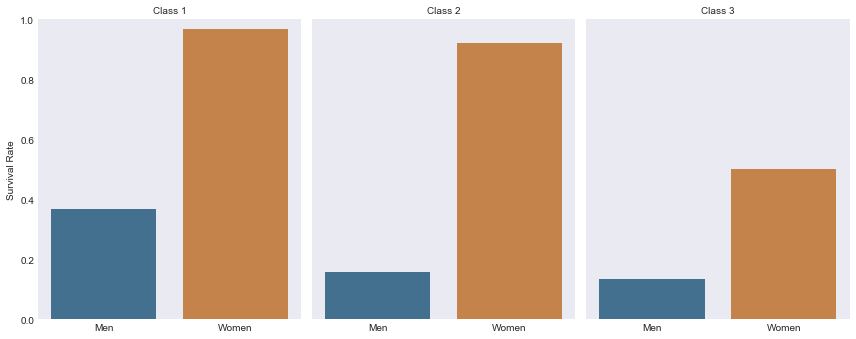

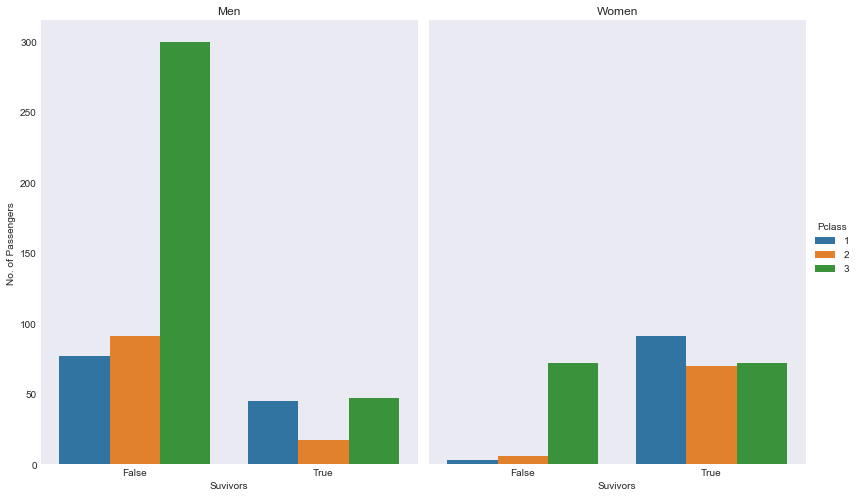

In [49]:
# Get the actual numbers grouped by class, suvival and sex
groupedby_class_survived_size = titanic_data_cleaned.groupby(['Pclass','Survived','Sex']).size()

# Print - Grouped by class, survival and sex
print groupedby_class_survived_size
print 'Class 1 - female survival rate: {}%'.format(survival_rate(1,'female'))
print 'Class 1 - male survival rate: {}%'.format(survival_rate(1,'male'))
print '-----'
print 'Class 2 - female survival rate: {}%'.format(survival_rate(2,'female'))
print 'Class 2 - male survival rate: {}%'.format(survival_rate(2,'male'))
print '-----'
print 'Class 3 - female survival rate: {}%'.format(survival_rate(3,'female'))
print 'Class 3 - male survival rate: {}%'.format(survival_rate(3,'male'))


# Graph - Grouped by class, survival and sex
g = sns.factorplot(x="Sex", y="Survived", col="Pclass", data=titanic_data_cleaned, 
                   saturation=.5, kind="bar", ci=None, size=5, aspect=.8)

# Fix up the labels
(g.set_axis_labels('', 'Survival Rate')
     .set_xticklabels(["Men", "Women"])
     .set_titles("Class {col_name}")
     .set(ylim=(0, 1))
     .despine(left=True, bottom=True))

# Graph - Actual count of passengers by survival, group and sex
g = sns.factorplot('Survived', col='Sex', hue='Pclass', data=titanic_data_cleaned, kind='count', size=7, aspect=.8)

# Fix up the labels
(g.set_axis_labels('Suvivors', 'No. of Passengers')
    .set_xticklabels(["False", "True"])
    .set_titles('{col_name}')
)

titles = ['Men', 'Women']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

Based on the raw numbers it would appear as though passengers in Class 3 had a similar survival rate as those from Class 1 with **119 and 136 passengers surviving respectively.** However, looking at the percentages of the overall passengers per class and the total numbers across each class, it can be assumed that **a passenger from Class 1 is about 2.5x times more likely to survive than a passenger in Class 3.** 

Social-economic standing was a factor in survival rate of passengers.

- Class 1: **62.96%**
- Class 2: **47.28%**
- Class 3: **24.24%**

**The number of mean survivals of 1st Passenger class (which are significantly less in number), clearly depicts the preference 
of the situation and how upper class had a better chance at survival than others.**<br/>

### Performing z-test to verify the hypothesis

How to prove the hypothesis that 1st class passengers had a better chance at survival?<br/>
Since the samples come from the population on the ship, we perform z-test to check if the upper class had better chance at survival than the population it is taken from. Our Hypothesis<br/>
$$
H_0: \text{ Upper class Didn't have better chance at survival}
$$
<br/>
$$
H_1: \text{ Upper class had better chance at survival}
$$
<br/>
$$
z = \frac{\text{sample mean} - \text{Population Mean}}{\text{Population Std / number of samples}}
$$
**alpha = 0.05<br/>
It is a positive z-test to check if Chances of Survival of Upper class is greater than Chances of Survival for Population.**

In [50]:
def z_test(sample, population):
    sample_mean = sample.mean()
    population_mean = population.mean()
    std_population = population.std()
    n = sample.shape[0]
    den = std_population / np.sqrt(n)
    
    return (sample_mean - population_mean) / den

print("Z-score: ", z_test(titanic_data_cleaned[titanic_data_cleaned["Pclass"]==1]["Survived"], titanic_data_cleaned["Survived"]))

('Z-score: ', 7.4238282590035354)


**Z-score for Positive z-test with alpha level 0.05 equals 1.645.**<br/>
**Z-score of survival of upper class (7.42) is significantly more than that of the population. This clearly indicates that upper class had a far better chance at survival.**

## Question 2
Did age, regardless of sex and class, determine your chances of survival?

Number of men and woman with age missing are 53 and 124 respectively
Total number of survivors 290 
Total number of non survivors 424 
Mean age of survivors 28.0 
Mean age of non survivors 31.0 
Oldest to survive 80.0 
Oldest to not survive 74.0


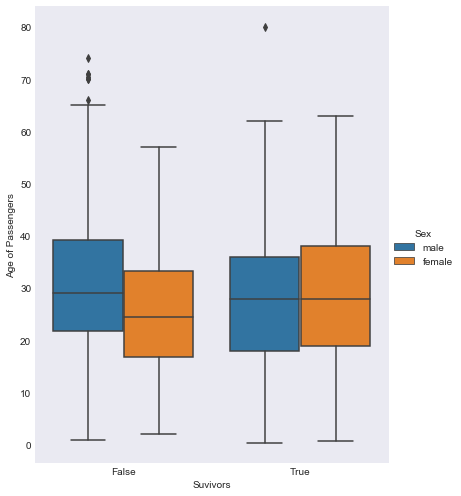

In [51]:
# Let us first identify and get rid of records with missing Age
print 'Number of men and woman with age missing are {} and {} respectively'.format(
missing_age_female.sum(),missing_age_male.sum())

# Drop the NaN values. Calculations will be okay with them (seen as zero) but will throw off averages and counts
titanic_data_age_cleaned = titanic_data_cleaned.dropna()

# Find total count of survivors and those who didn't
number_survived = titanic_data_age_cleaned[titanic_data_age_cleaned['Survived'] == True]['Survived'].count()
number_died = titanic_data_age_cleaned[titanic_data_age_cleaned['Survived'] == False]['Survived'].count()

# Find average of survivors and those who didn't
mean_age_survived = titanic_data_age_cleaned[titanic_data_age_cleaned['Survived'] == True]['Age'].mean()
mean_age_died = titanic_data_age_cleaned[titanic_data_age_cleaned['Survived'] == False]['Age'].mean()

# Display a few raw totals
print 'Total number of survivors {} \n\
Total number of non survivors {} \n\
Mean age of survivors {} \n\
Mean age of non survivors {} \n\
Oldest to survive {} \n\
Oldest to not survive {}' \
.format(number_survived, number_died, np.round(mean_age_survived), 
        np.round(mean_age_died), oldest_to_survive, oldest_to_die)

# Graph - Age of passengers across sex of those who survived
g = sns.factorplot(x="Survived", y="Age", hue='Sex', data=titanic_data_age_cleaned, kind="box", size=7, aspect=.8)

# Fix up the labels
(g.set_axis_labels('Suvivors', 'Age of Passengers')
    .set_xticklabels(["False", "True"])
)

Based on the above boxplot and calculated data, it would appear that:
- Regardless of sex and class, **age was not** a deciding factor in the passenger survival rate
- Average age for those who survived and even those who did not survive were inline with each other

## Question 3
Did women and children have preference to lifeboats and therefore survival (assuming there was no shortage of lifeboats)?

**Assumption:** With "child" not classified in the data, I'll need to assume a cutoff point. Therefore, I'll be using today's standard of under 18 as those to be considered as a child vs adult

Category  Survived
Child     0            52
          1            61
Man       0           325
          1            70
Woman     0            47
          1           159
dtype: int64


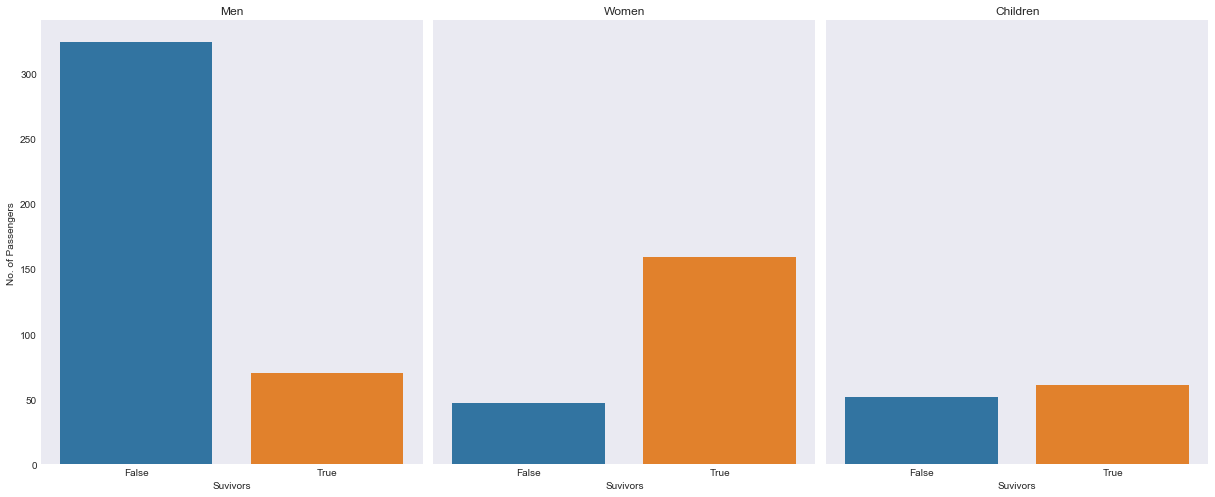

In [52]:
# Create Cateogry column and categorize people
titanic_data_age_cleaned.loc[
    ( (titanic_data_age_cleaned['Sex'] == 'female') & 
    (titanic_data_age_cleaned['Age'] >= 18) ),
    'Category'] = 'Woman'

titanic_data_age_cleaned.loc[
    ( (titanic_data_age_cleaned['Sex'] == 'male') & 
    (titanic_data_age_cleaned['Age'] >= 18) ),
    'Category'] = 'Man'

titanic_data_age_cleaned.loc[
    (titanic_data_age_cleaned['Age'] < 18),
    'Category'] = 'Child'

# Get the totals grouped by Men, Women and Children, and by survival
print titanic_data_age_cleaned.groupby(['Category','Survived']).size()

# Graph - Compare survival count between Men, Women and Children
g = sns.factorplot('Survived', col='Category', data=titanic_data_age_cleaned, kind='count', size=7, aspect=.8)

# Fix up the labels
(g.set_axis_labels('Suvivors', 'No. of Passengers')
    .set_xticklabels(['False', 'True'])
)

titles = ['Men', 'Women', 'Children']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

The data, and more so, the graphs tends to support the idea that "women and children first" possibly played a role in the survival of a number of people. It's a bit surprising that more children didn't survive but this could possibly be attributed to the mis-representation of what age is considered as the cut off for adults - i.e. if in the 1900's someone 15-17 were considered adults, they would not have been "saved" under the "women and children first" idea and would be made to fend for themselves. That would in turn, change the outcome of the above data and possible increase the number of children who survived.

## Conclusion

The results of the analysis, although tentative, would appear to indicate that class and sex, namely, being a female with upper social-economic standing (first class), would give one the best chance of survival when the tragedy occurred on the Titanic. Age did not seem to be a major factor. While being a man in third class, gave one the lowest chance of survival. Women and children, across all classes, tend to have a higher survival rate than men in general but by no means did being a child or woman guarentee survival.

**Issues:**
- A portion of men and women did not have Age data and were removed from calculations which could have skewed some numbers
- The category of 'children' was assumed to be anyone under the age of 18, using today's North American standard for adulthood which was certainly not the case in the 1900s

## References

- https://www.kaggle.com/c/titanic/data
- http://nbviewer.jupyter.org/github/jvns/pandas-cookbook/tree/master/cookbook/
- http://seaborn.pydata.org/generated/seaborn.factorplot.html#seaborn.factorplot
- https://www.datacamp.com/community/blog/seaborn-cheat-sheet-python